In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#### D_work
Описание статусов относительно работы:
ID — идентификатор социального статуса клиента относительно работы;
COMMENT — расшифровка статуса.

#### D_pens
Описание статусов относительно пенсии:
ID — идентификатор социального статуса;
COMMENT — расшифровка статуса.

#### D_clients
Описание данных клиентов:
ID — идентификатор записи;
AGE — возраст клиента;
GENDER — пол клиента (1 — мужчина, 0 — женщина);
EDUCATION — образование;
MARITAL_STATUS — семейное положение;
CHILD_TOTAL — количество детей клиента;
DEPENDANTS — количество иждивенцев клиента;
SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
REG_ADDRESS_PROVINCE — область регистрации клиента;
FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
OWN_AUTO — количество автомобилей в собственности.

#### D_target
Таблица с зафиксированными откликами клиентов на предложения банка:
AGREEMENT_RK — уникальный идентификатор объекта в выборке;
ID_CLIENT — идентификатор клиента;
TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).

#### D_job
Описание информации о работе клиентов:
GEN_INDUSTRY — отрасль работы клиента;
GEN_TITLE — должность;
JOB_DIR — направление деятельности внутри компании;
WORK_TIME — время работы на текущем месте (в месяцах);
ID_CLIENT — идентификатор клиента.

#### D_salary
Описание информации о заработной плате клиентов:
ID_CLIENT — идентификатор клиента;
FAMILY_INCOME — семейный доход (несколько категорий);
PERSONAL_INCOME — личный доход клиента (в рублях).

#### D_last_credit
Информация о последнем займе клиента:
ID_CLIENT — идентификатор клиента;
CREDIT — сумма последнего кредита клиента (в рублях);
TERM — срок кредита;
FST_PAYMENT — первоначальный взнос (в рублях).

#### D_loan
Информация о кредитной истории клиента:
ID_CLIENT — идентификатор клиента;
ID_LOAN — идентификатор кредита.

#### D_close_loan
Информация о статусах кредита (ссуд):
ID_LOAN — идентификатор кредита;
CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

In [2]:
work = pd.read_csv('../data/D_work.csv')
pens = pd.read_csv('../data/D_pens.csv')
clients = pd.read_csv('../data/D_clients.csv')
job = pd.read_csv('../data/D_job.csv')
salary = pd.read_csv('../data/D_salary.csv')
last_credit = pd.read_csv('../data/D_last_credit.csv')
loan = pd.read_csv('../data/D_loan.csv')
close_loan = pd.read_csv('../data/D_close_loan.csv')
target = pd.read_csv('../data/D_target.csv')

In [3]:
clients[clients['ID'].duplicated() == True]

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO


In [4]:
clients.head(3)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1


In [5]:
target[target['AGREEMENT_RK'].duplicated() == True]

,AGREEMENT_RK,ID_CLIENT,TARGET


In [6]:
target['TARGET'].value_counts()

TARGET
0    13411
1     1812
Name: count, dtype: int64

D_close_loan
D_loan
-- не добавляю, так как это создаст дубли в информации о пользователях

In [7]:
work = work[['FLAG', 'COMMENT']]
work.columns = ['SOCSTATUS_WORK_FL', 'WORK_STATUS']
job.columns = ['GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR', 'WORK_TIME', 'ID']
job = job.drop_duplicates(['ID'])
last_credit.columns = ['CREDIT', 'TERM', 'FST_PAYMENT', 'ID']
last_credit = last_credit.drop_duplicates(['ID'])
pens = pens[['FLAG', 'COMMENT']]
pens.columns = ['SOCSTATUS_PENS_FL', 'PENS_STATUS']
salary.columns = ['FAMILY_INCOME', 'PERSONAL_INCOME', 'ID']
salary = salary.drop_duplicates(['ID'])
target = target[['ID_CLIENT', 'TARGET']]
target.columns = ['ID', 'TARGET']
target = target.drop_duplicates(['ID'])

In [8]:
full_table = (
    clients
    .merge(work, on='SOCSTATUS_WORK_FL', how='left', validate='many_to_one')
    .merge(job, on='ID', how='left', validate='one_to_one')
    .merge(last_credit, on='ID', how='left', validate='one_to_one')
    .merge(pens, on='SOCSTATUS_PENS_FL', how='left', validate='many_to_one')
    .merge(salary, on='ID', how='left', validate='one_to_one')
    .merge(target, on='ID', how='left', validate='one_to_one')
    .drop(['SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL'], axis=1)
)

In [9]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       16000 non-null  int64  
 1   AGE                      16000 non-null  int64  
 2   GENDER                   16000 non-null  int64  
 3   EDUCATION                16000 non-null  object 
 4   MARITAL_STATUS           16000 non-null  object 
 5   CHILD_TOTAL              16000 non-null  int64  
 6   DEPENDANTS               16000 non-null  int64  
 7   REG_ADDRESS_PROVINCE     16000 non-null  object 
 8   FACT_ADDRESS_PROVINCE    16000 non-null  object 
 9   POSTAL_ADDRESS_PROVINCE  16000 non-null  object 
 10  FL_PRESENCE_FL           16000 non-null  int64  
 11  OWN_AUTO                 16000 non-null  int64  
 12  WORK_STATUS              16000 non-null  object 
 13  GEN_INDUSTRY             13856 non-null  object 
 14  GEN_TITLE             

In [10]:
full_table.head(3)

,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,...,GEN_TITLE,JOB_DIR,WORK_TIME,CREDIT,TERM,FST_PAYMENT,PENS_STATUS,FAMILY_INCOME,PERSONAL_INCOME,TARGET
0,106805103,42,1,Среднее,Не состоял в браке,1,0,Московская область,Московская область,Московская область,...,Работник сферы услуг,Участие в основ. деятельности,3.0,5588.0,6.0,1000.0,пенсионер,от 20000 до 50000 руб.,25000.0,1.0
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,Читинская область,Читинская область,Читинская область,...,Специалист,Участие в основ. деятельности,5.0,19498.0,12.0,0.0,пенсионер,от 10000 до 20000 руб.,10000.0,0.0
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,Иркутская область,Иркутская область,Иркутская область,...,Руководитель высшего звена,Участие в основ. деятельности,360.0,15470.0,3.0,15000.0,не пенсионер,от 20000 до 50000 руб.,30000.0,0.0


In [11]:
num_cols = ['AGE', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'FL_PRESENCE_FL',
            'OWN_AUTO', 'WORK_TIME', 'CREDIT', 'TERM', 'FST_PAYMENT',
            'PERSONAL_INCOME', 'TARGET']

In [12]:
cat_cols = ['EDUCATION', 'MARITAL_STATUS', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE',
            'POSTAL_ADDRESS_PROVINCE', 'WORK_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'JOB_DIR',
            'PENS_STATUS', 'FAMILY_INCOME']

<Axes: >

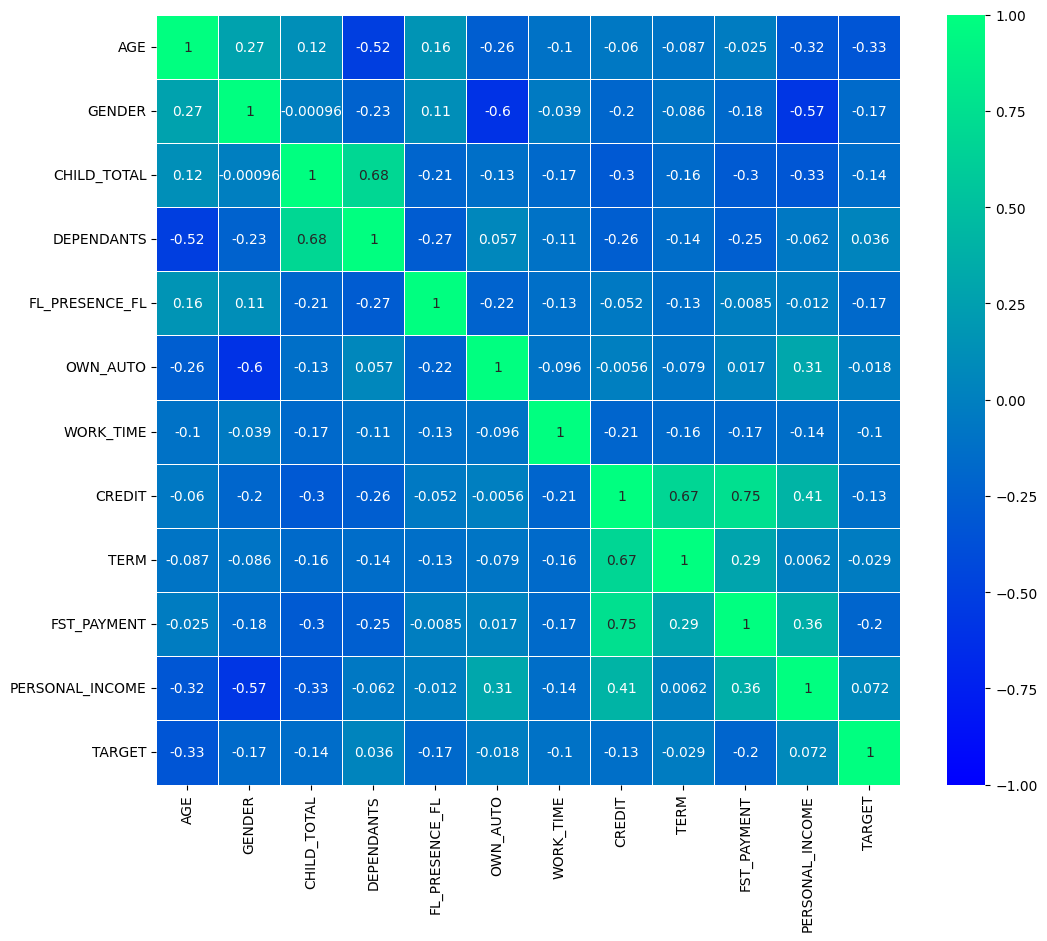

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,10))
sns.heatmap(full_table[num_cols].corr().corr(),
            vmax=1, vmin=-1, cmap='winter', annot=True, linewidth=.5)

In [ ]:
# your code here
sns.pairplot(full_table[num_cols])

In [ ]:
# рассеяние для самых скореллированных признаков
sns.scatterplot(data=df_train, x='max_power', y='engine',
                hue='selling_price', hue_norm=(0, 3000000))

In [ ]:
# Создаем фигуру и оси
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# Создаем график seaborn на первой подграфике
sb.histplot(users_df[~users_df['age'].isna()]['age'].sort_values().apply(lambda x: str(x)[4:]), ax=ax[0, 0])
ax[0, 0].set_title('Распределение пользователей по возрасту')
ax[0, 0].set_xlabel('Кол-во пользователей')
ax[0, 0].set_ylabel('Корзины по возрасту')
#ax[0, 0].set_xticklabels(ax[0, 0].get_xticks(), rotation=45)


# Создаем график seaborn на второй подграфике
sb.histplot(users_df[~users_df['income'].isna()]['income'].replace('income_150_inf','income_more_150').sort_values().apply(lambda x: str(x)[7:]), ax=ax[0, 1])
ax[0, 1].set_title('Распределение пользователей по доходу')
ax[0, 1].set_xlabel('Кол-во пользователей')
ax[0, 1].set_ylabel('Корзины по доходу')

# Создаем график seaborn на третьей подграфике
sb.histplot(users_df[~users_df['sex'].isna()]['sex'].sort_values().apply(lambda x: str(x)), ax=ax[1, 0])
ax[1, 0].set_title('Распределение пользователей по полу')
ax[1, 0].set_xlabel('Кол-во пользователей')
ax[1, 0].set_ylabel('Корзины по полу')


# Создаем график seaborn на четвертой подграфике
sb.histplot(users_df[~users_df['kids_flg'].isna()]['kids_flg'].sort_values().apply(lambda x: str(x)), ax=ax[1, 1])
ax[1, 1].set_title('Распределение пользователей по наличию детей')
ax[1, 1].set_xlabel('Кол-во пользователей')
ax[1, 1].set_ylabel('Флаг наличия детей')

plt.show()

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,12)) # увеличиваем количество объектов до двух рядов и двух колонок. Также увеличиваем размер изображения.
#plt.figure(figsize=(10,6))

ax[0].plot(man_age['age'], man_age['cnt'], '-.')
ax[0].plot(wooman_age['age'], wooman_age['cnt'], '--')
ax[0].plot(total_age['age'], total_age['cnt'])

ax[0].set_title('Распределение пользователей по полу и возрасту', fontsize=14)
ax[0].set_xlabel('Количество пользователей', fontsize=12)
ax[0].set_ylabel('Корзины по возрасту', fontsize=12)


ax[0].legend(['Мужчины', 'Женщины', 'Всего'])
ax[0].grid()


ax[1].scatter(df_gr['age'], df_gr['income'], s = df_gr['user_id']/100) # user_id -> cnt clients

ax[1].set_xlabel('Корзина по возрасту', fontsize=12)
ax[1].set_ylabel('Корзина по доходу', fontsize=12)
ax[1].set_title('Пузырьковая диаграмма распределения клиентов по корзинам (кол-во человек)', fontsize=14)

ax[1].grid()

plt.show()

In [ ]:
targ_data = interactions_df[interactions_df['watched_pct'].isna() == False][['watched_pct']]

fig, ax1 = plt.subplots()
sb.kdeplot(data=targ_data, x="watched_pct", ax=ax1)
ax1.set_xlim((targ_data["watched_pct"].min(), targ_data["watched_pct"].max()))
ax2 = ax1.twinx()
sb.histplot(data=targ_data, x="watched_pct", discrete=True, ax=ax2)